# DATA REPORT - Multivariate Gaussian

In our second data report, we have to work on the same dataset, but this time, we would like to use Multivariate Gaussians for modelling the data (last time we used Categorical Models). This means we have to move from categorical variables to continuous variables.
So again, we will work with the allbus2016 dataset, what is a general report about the population in Germany. We still would like to explore the distributions about political attitude which we will derive from several random variables and compare them to the elections in Germany.

# Data Import and Cleansing

The allbus2016 dataset contains hundreds of variables. We try to choose a valid combination of them and transform them to continuous (if necessary). This time we choose:
 - education ('educ')
 - income ('inc')
 - age ('age')
 - happiness ('ls01')
 - health ('hs01')
 - months abroad ('lt23')
 - preferred party ('pv01')
 
We also have used some of this variables in our Categorical Model, this means they were categoricals. Thus we have to transform some of them to continuous variables.

What is necessary that a categorical variable can be transformed to a continuous? Well, there must be some kind of order on the domain of the categorical variable in order to map them to some kind of scale. Let us check this for one example. We have the variable education ('educ') with entries like "ABITUR" or "MITTLERE REIFE" (in the raw data, we get numericals). Obviously there is an order on the domain, because we can compare the elements. For example "ABITUR" is greater than "MITTLERE REIFE". This can be done with all elements in the domain. The result is a scale what is showing us some level of education. Lucklily we can import the dataset without a mapping from the numericals to categories! And fortunately they are in the right order (can be read in the Codebook). So we only have to remove the values which are not part of the scale. In this example we speak about values like "KEINE ANGABE", what was transformed to '-9'.

Let us have a first look at the data. As I mentioned, we are importing without the mapping to categories. So we get the raw data:

In [4]:
import pandas as pd
df = pd.read_stata('allbus2016/allbus2016.dta', columns=['educ', 'inc', 'age', 'ls01', 'hs01', 'lt23', 'pv01'], convert_categoricals=False)
df.head()

,educ,inc,age,ls01,hs01,lt23,pv01
0,3,1800,47,9,3,-10,6
1,3,2000,52,8,3,-10,3
2,2,2500,61,9,2,-10,1
3,2,860,54,3,4,18,6
4,5,-9,71,9,3,6,-9


We notice that some variables do not have a scale, for example the the variable for preferred party ('pv01'). I generated a scale over the parties from left (1) to right (11) what should display the political spectrum and the position where one participant is located. This scale is certainly not perfect, but should show a vaguely tendency of the political attitude of a single participant. The scale we use:
 - DIE LINKE - 1
 - DIE GRÜNEN - 2
 - SPD - 3
 - PIRATEN - 4
 - FDP - 5
 - CDU/CSU - 6
 - AFD - 9
 - NPD - 11
 
Of course, the political spectrum has surely more dimensions than left-right, but as I said, this mapping can be improved and should only give an approximately impression where a participant is located in the political spectrum. 

I have written a script what is editing the dataset such that we can use it for our exploration. This can be checked in the file Data_Cleansing.ipynb. Let us have a look at the cleaned data:

In [19]:
df = pd.read_csv('datasets/allbus2016.csv', index_col=0)
df.head()

,educ,inc,age,happiness,health,months_abroad,pref_party
0,3,1800,47,9,3,0,1
1,3,2000,52,8,3,0,5
2,2,2500,61,9,4,0,6
3,2,860,54,3,2,18,1
4,3,2500,49,7,5,0,6


Next to cleansing of the single columns, I also replaced the names of the columns. Now we can have a look at the scatter matrix of our dataset:

<IPython.core.display.Javascript object>


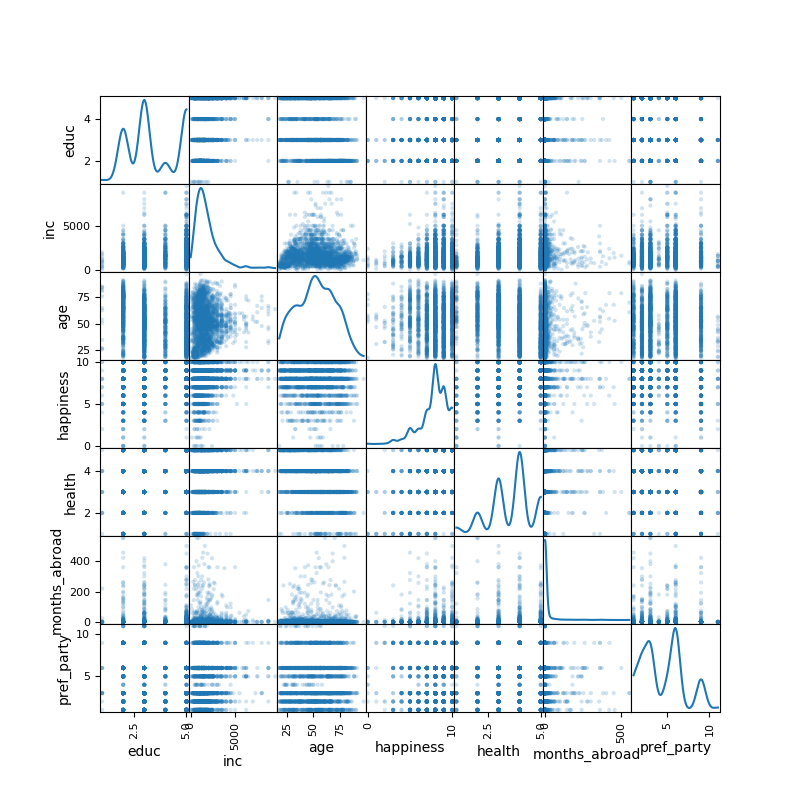

In [37]:
%matplotlib notebook
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='kde');

As we can see on the diagonal in the scatter matrix, most of the single variables are not really gaussian distributed. Especially the variables, that were mapped manually to a scale do not fit perfectly in our model. Nevertheless we get a good impression about the data that we are going to model a Multivariate Gaussian Model.